In [111]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [112]:
df = pd.read_csv("insurance.csv")

In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
df.shape

(1338, 7)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [117]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* ÖNCE VERİLERİ ÖLÇEKLENDİRELİM

In [118]:
df["sex"] = df["sex"].map({'female':1 , 'male':0})

In [119]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [120]:
df["region"] = df["region"].map({'southwest':0 , 'southeast':1 , 'northwest':2 ,'northeast':3})
df["smoker"] = df["smoker"].map({'no':0 , 'yes':1 })

In [121]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


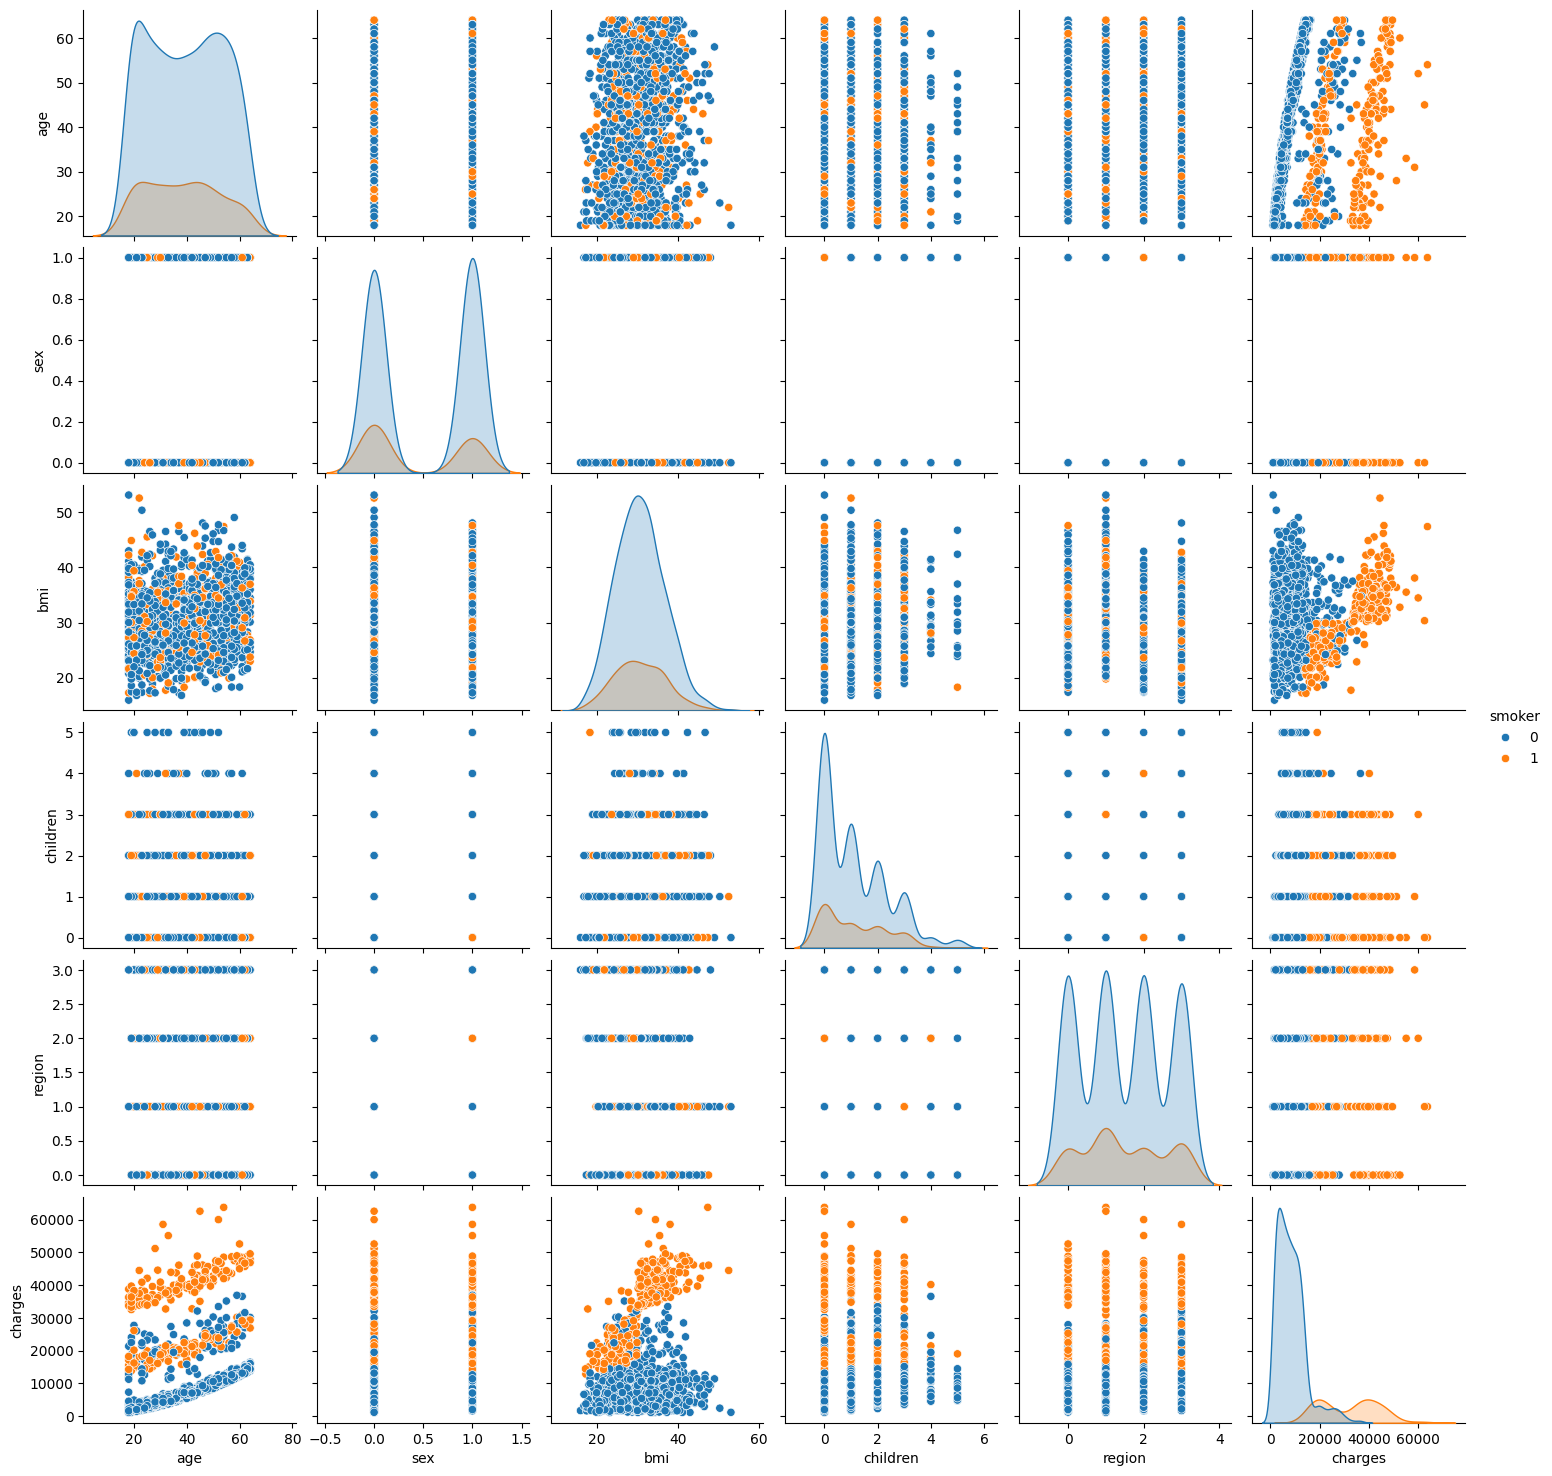

In [122]:
sns.pairplot(df , hue="smoker")

# SMOKER İÇİN CLASS İŞLEMLERİ

In [123]:
x = df.drop("smoker" , axis=1)
y = df["smoker"]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)

In [125]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [126]:
y_train.shape

(896,)

In [127]:
y_train.head()

1046    0
682     1
1037    1
490     0
39      1
Name: smoker, dtype: int64

In [128]:
from keras.utils import to_categorical

y_test = to_categorical(y_test , 2)
y_train = to_categorical(y_train ,2)

In [135]:
from tensorflow.keras import initializers  # Kernel initializer'lar için
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(256 , activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(),
    Dense(128 , activation="relu", kernel_initializer=initializers.HeUniform()),
    Dropout(0.2),
    Dense(64 , activation="relu", kernel_initializer=initializers.HeUniform()),
    BatchNormalization(),
    Dense(32 , activation="relu", kernel_initializer=initializers.HeUniform()),
    Dense(2 , activation="softmax", kernel_initializer=initializers.HeUniform())
    ])

In [136]:
model.compile(optimizer=Adam(learning_rate=0.0001) , loss="categorical_crossentropy",metrics=["accuracy"])

In [137]:
y_train.shape

(896, 2)

In [138]:
y_test.shape

(442, 2)

In [139]:
X_test.shape

(442, 6)

In [140]:
fit = model.fit(scaler_X_train , y_train , epochs=64 , batch_size=128 , validation_data=(scaler_X_test , y_test))

Epoch 1/64


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7836 - loss: 0.5666 - val_accuracy: 0.7851 - val_loss: 0.5195
Epoch 2/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8214 - loss: 0.4925 - val_accuracy: 0.7602 - val_loss: 0.5152
Epoch 3/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8011 - loss: 0.4590 - val_accuracy: 0.7692 - val_loss: 0.5126
Epoch 4/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8365 - loss: 0.3920 - val_accuracy: 0.7624 - val_loss: 0.5062
Epoch 5/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8629 - loss: 0.3296 - val_accuracy: 0.7715 - val_loss: 0.4982
Epoch 6/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8687 - loss: 0.3329 - val_accuracy: 0.8032 - val_loss: 0.4870
Epoch 7/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8767 - loss: 0.2862 - val_accuracy: 0.8258 - val_loss: 0.4732
Epoch 8/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9005 - loss: 0.2472 - val_accuracy: 0.8484 - val_loss: 0.4578
Epoch 9/64


In [141]:
pred = model.predict(scaler_X_test)

pred_val = pred.argmax(axis=1)
acc=  y_test.argmax(axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
mae = round(mean_absolute_error(acc ,pred_val),3)
rmse = round(mean_squared_error(acc,pred_val),3)

In [147]:
print("mae : " , mae)
print("rmse : " , rmse)

mae :  0.048
rmse :  0.048


In [148]:
print(classification_report(acc, pred_val))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       356
           1       0.84      0.94      0.89        86

    accuracy                           0.95       442
   macro avg       0.91      0.95      0.93       442
weighted avg       0.96      0.95      0.95       442



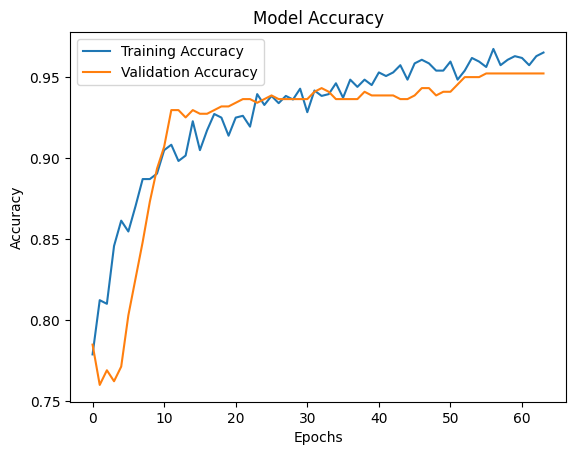

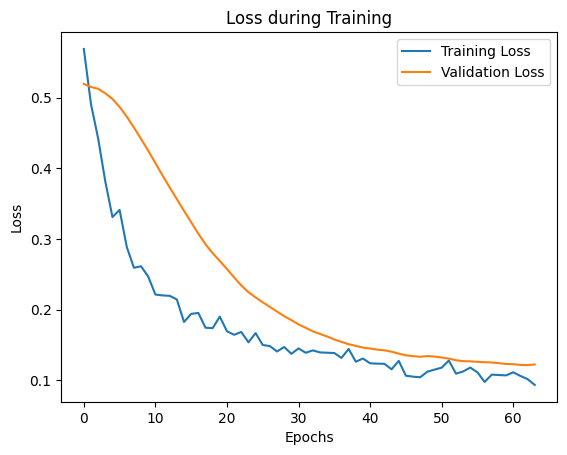

In [149]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')  # Corrected this line
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')  # Corrected this line
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# REGRESYON OLARAK DA ANN YAPALIM

In [150]:
x=df.drop("charges" , axis=1)
y = df["charges"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
 x, y, test_size=0.33, random_state=42)

In [152]:
scaler_regr = MinMaxScaler()
scaler_X_train_regr = scaler_regr.fit_transform(X_train)
scaler_X_test_regr = scaler_regr.transform(X_test)

In [154]:
y_train.shape

(896,)

In [157]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Girdi katmanı
    Dense(128, activation='relu'),  # Gizli katman
    Dense(64, activation='relu'),  # Gizli katman
    Dense(32, activation='relu'),  # Gizli katman
    Dense(1)  # Çıktı katmanı, tek bir değer olacak
])

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Tahmin yapma
predictions = model.predict(X_test)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 329817024.0000 - val_loss: 312417216.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 291059744.0000 - val_loss: 264245824.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 231240928.0000 - val_loss: 128754896.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123334600.0000 - val_loss: 128256608.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124338192.0000 - val_loss: 127716392.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133231416.0000 - val_loss: 127590112.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135007152.0000 - val_loss: 126926616.0000
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137010464.0000 - val_loss: 126553520.0000
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129876952.0000 - val_loss: 126213944.0000
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141070208.0000 - val_loss: 1258

In [163]:
from sklearn.metrics import r2_score

In [166]:
mae = round(mean_absolute_error(y_test ,predictions),3)
rmse = round(np.sqrt(mean_squared_error(y_test,predictions)),3)
r2 = round(r2_score(y_test,predictions) , 4)

In [167]:
print("mae : " , mae)
print("rmse : " , rmse)
print("r2 : " , r2)



mae :  3515.963
rmse :  5391.03
r2 :  0.8017
